## Потеря значимости

In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3], float)
b = np.array([0, 1, 1], float)
np.dot(a, b)

5.0

In [3]:
x = lambda a, dtype: np.array([10**a, 1223, 10**(a-1), 10**(a-2), 3, -10**(a-5)], dtype)
y = lambda b, dtype: np.array([10**b, 2, -10**(b+1), 10**b, 2111, 10**(b+3)], dtype)

In [4]:
bs = [5, 8, 12, 15, 20] 

In [5]:
[np.dot(x(5, np.float32), y(b, np.float32)) for b in bs]    

[8384.0, 8192.0, 0.0, 0.0, 0.0]

In [6]:
[np.dot(x(5, np.float64), y(b, np.float64)) for b in bs]  

[8779.0, 8779.0, 8781.0, 6272.0, 0.0]

In [7]:
[np.dot(x(10, np.float32), y(b, np.float32)) for b in bs]    

[0.0, 0.0, 0.0, -1.1529215e+18, 1.1805916e+21]

In [8]:
[np.dot(x(10, np.float64), y(b, np.float64)) for b in bs]    

[8779.0, 8764.0, 0.0, 0.0, 0.0]

In [9]:
[np.dot(x(5, np.posit32), y(b, np.posit32)) for b in bs]    

[-2912.000000,
 -40894464.000000,
 -6287832121344.000000,
 -20688410788233216.000000,
 -28039050992038518456320.000000]

In [10]:
[np.dot(x(10, np.posit32), y(b, np.posit32)) for b in bs]    

[-11382456320.000000,
 -59871844106240.000000,
 16550728630586572800.000000,
 -26415737513552077914112.000000,
 -44565841414273689896368472064.000000]

In [11]:
from unum import Unum as posit

In [12]:
[np.dot(x(5, posit), y(b, posit)) for b in bs]

[8779, 8779, 8779, 8779, 8779]

In [13]:
[np.dot(x(10, posit), y(b, posit)) for b in bs]

[8779, 8779, 8779, 8779, 8779]

## Закон ассоциативности

In [14]:
sum(np.array([1/i**2 for i in range(1, 4801)], np.float32))

1.6447257546352674

In [15]:
sum(np.array([1/i**2 for i in range(1, 4801)], np.float64))

1.6447257552147838

In [16]:
np.sum(np.array(list(map(lambda x: 1/x**2, range(1, 4801))), np.float32))

1.6447257

In [17]:
np.sum(np.array(list(map(lambda x: 1/x**2, range(1, 4801))), np.float64))

1.644725755214775

In [18]:
np.sum(np.fromiter(map(lambda x: 1/x**2, range(1, 4801)), np.float64))

1.644725755214775

In [57]:
np.sum(np.array(list(map(lambda x: 1/x**2, range(1, 4801))), posit))

1.6447257552147838

**1.644725755214774951145**

## Kahan’s "Smooth Surprise"

In [21]:
toFloat32 = lambda x: np.array(x, np.float32)
toFloat64 = lambda x: np.array(x, np.float64)
toPosit32 = lambda x: np.array(x, np.posit32)
toPositU = lambda x: np.array(x, posit)

In [22]:
from scipy.optimize import fmin

f = lambda x: np.log(np.absolute(3*(1-x)+1))/80 + np.power(x, 2) + 1

f(1.3333333333333333)

2.327232110413813

In [23]:
toPositU(f(1.3333333333333333))

array(2.327232110413813, dtype=object)

In [24]:
fmin(f, 0.8)

Optimization terminated successfully.
         Current function value: 1.017307
         Iterations: 17
         Function evaluations: 34


array([0.0046875])

In [25]:
import matplotlib.pyplot as plt

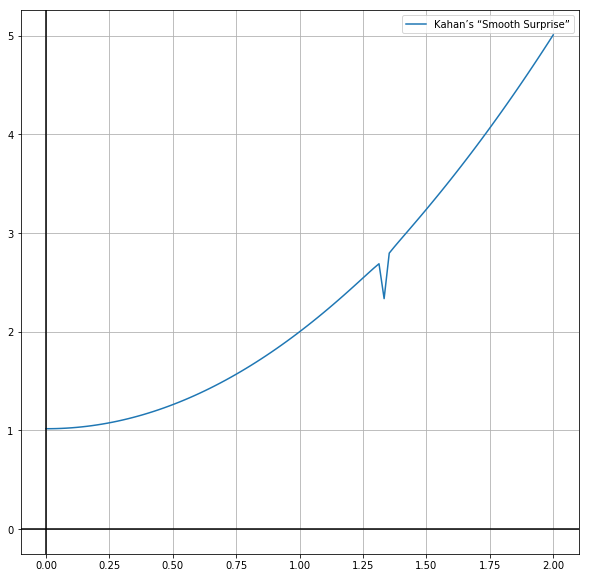

In [26]:
x = np.linspace(0, 2, 100)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(x, f(x), label='Kahan’s “Smooth Surprise”')
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.legend()

In [27]:
f2 = lambda x: (x - 4/3)**2

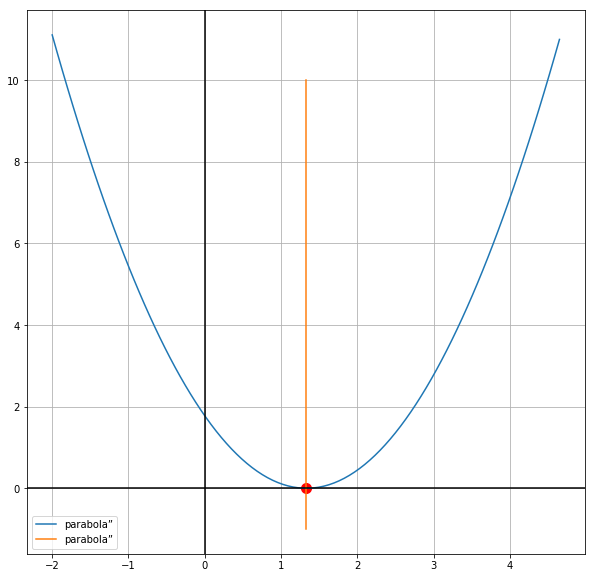

In [58]:
x1 = np.linspace(-2, 4.65, 100)
y1 = f2(x1)
x2 = [4/3, 4/3]
y2 = [-1, 10]
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.plot(x1, y1, x2, y2, label='parabola”')
ax2.scatter(4/3, 0, color="r", s=100)
ax2.grid(True, which='both')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
plt.legend()

In [29]:
def half_divide_method(a, b, stop, f, transformer, iterations):
    a, b = transformer(a), transformer(b)
    x = (a + b) / transformer(2)
    stop = transformer(stop)
    i = 0
    while np.absolute(transformer(f(x))) >=stop and i < iterations:
        x = (a + b) / transformer(2)
        a, b = (a, x) if transformer(f(a)) * transformer(f(x)) < 0 else (x, b)
        i += 1
    return (a + b) / 2

In [60]:
half_divide_method(-2, 4.65,  0.0001, f2,toFloat32, 10000000)

1.3250000476837158

In [62]:
half_divide_method(-2, 4.65,  0.0001, f2,toFloat64, 10000000)

1.3250000000000002

In [32]:
half_divide_method(-2, 4.65,  0.0001, f2, toPosit32,10000000)

1.325000

In [63]:
half_divide_method(-2, 4.65,  0.0001, f2, toPositU, 10000000)

1.3250000000000002

In [83]:
half_divide_method2(1.3, 1.4, f(4/3), f, toPositU, 100)

1.3000000000000003

In [36]:
half_divide_method(1.3, 1.4, 2.7850532, f, toFloat32, 10000000)

1.3499999046325684

In [39]:
f(1.3499999046325684)

2.78505301756274

In [40]:
stop = 1.4
res = 0
steps = 10
while res != stop and steps < 20:
    res = half_divide_method(1.3, 1.4, 2.327232110413813, f, toFloat32, steps)
    print(res)
    steps += 1

1.3999512195587158
1.3999755382537842
1.3999876976013184
1.399993896484375
1.3999969959259033
1.399998426437378
1.3999991416931152
1.3999996185302734
1.3999998569488525
1.3999998569488525


In [ ]:
f(1.3333333333333333)

In [41]:
stop = 1.4
res = 0
steps = 10
while res != stop and steps < 100:
    res = half_divide_method(1.3, 1.4, 2.327232110413813, f, toFloat64, steps)
    print(res)
    steps += 1

1.399951171875
1.3999755859374998
1.3999877929687499
1.399993896484375
1.3999969482421875
1.3999984741210936
1.3999992370605467
1.3999996185302734
1.3999998092651367
1.3999999046325682
1.399999952316284
1.399999976158142
1.399999988079071
1.3999999940395353
1.3999999970197676
1.3999999985098839
1.399999999254942
1.3999999996274708
1.3999999998137354
1.3999999999068677
1.3999999999534338
1.3999999999767168
1.3999999999883583
1.3999999999941792
1.3999999999970896
1.3999999999985446
1.3999999999992723
1.3999999999996362
1.399999999999818
1.3999999999999089
1.3999999999999544
1.3999999999999773
1.3999999999999886
1.3999999999999941
1.399999999999997
1.3999999999999986
1.3999999999999992
1.3999999999999995
1.3999999999999997
1.4


In [64]:
half_divide_method(1.3, 1.4, 2.32, f, toPositU, 100)

1.4

In [33]:
def half_divide_method2(a, b, stop, f, transformer, iterations):
    eps = transformer(0.5)
    a, b = transformer(a), transformer(b)
    x = (a + b) / transformer(2)
    stop = transformer(stop)
    i = 0
    while transformer(f(x)) >=stop and i < iterations:
        x = (a + b) / transformer(2)
        f1 = transformer(f(x - eps))
        f2 = transformer(f(x + eps))
        a, b = (a, x) if f1 < f2 else (x, b)
        i += 1
    return (a + b) / 2

In [43]:
half_divide_method2(1.3, 1.4, 2.327232110413813, f, toFloat32, 100)

1.2999999523162842

In [44]:
half_divide_method2(1.3, 1.4, 2.327232110413813, f, toFloat64, 100)

1.3000000000000003

In [49]:
half_divide_method2(1.3, 1.4, 2.327232110413813, f, toPositU, 100)

1.3000000000000003